<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Ogembo-Last-90-Days" data-toc-modified-id="Ogembo-Last-90-Days-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ogembo Last 90 Days</a></span></li></ul></li><li><span><a href="#KE-Data" data-toc-modified-id="KE-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KE Data</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Summary-Stats-for-Ogembo" data-toc-modified-id="Summary-Stats-for-Ogembo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary Stats for Ogembo</a></span></li></ul></li></ul></div>

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [129]:
## load libz and configurations 
%run "../../Utilz/load_envz.ipynb"

In [51]:
## load dataset OG
og_only_dataset = pd.read_csv( "%s/LG/Ogembo_targeted_chv_support_ke-20180326.csv" % DATA_DIR )  

print("\n1. OG Only Shape")
og_only_dataset.shape
og_only_dataset.info()

## load dataset KE
KE_3yrs_dataset = pd.read_csv( "%s/LG/Branch Data 2015-2017.csv" % DATA_DIR )  

print("\n2. KE 3 yrs Shape")
KE_3yrs_dataset.shape
KE_3yrs_dataset.info()

## rename colums 
#dataset.rename(columns={ "old": "new"}, inplace=True)
## drop unwanted
#dataset.drop( ['colz'], axis=1, inplace=True)


1. OG Only Shape


(143, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 23 columns):
CHP                                  143 non-null object
Phone Number                         143 non-null float64
CHP ID                               143 non-null object
Pregnancy                            143 non-null int64
PNC Visit Rate                       143 non-null float64
PNC Visit Missed - #                 143 non-null int64
Total U1 Assessments                 143 non-null int64
Total U1 Treatments                  143 non-null int64
Total U5 Assessments                 143 non-null int64
Total U5 Treatments                  143 non-null int64
U5 Malaria                           143 non-null int64
U5 Diarrhea                          143 non-null int64
U5 Pneumonia                         143 non-null int64
On Time Referral f/u Treatment U5    143 non-null float64
Missed Visits                        143 non-null int64
%mRDT                                143 non-nu

(504, 90)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 90 columns):
branch_uuid                                      504 non-null object
branch_name                                      504 non-null object
supervisor_uuid                                  504 non-null object
supervisor_name                                  504 non-null object
chw_uuid                                         504 non-null object
chw_name                                         504 non-null object
chw_phone                                        504 non-null object
interval_start                                   504 non-null object
interval_number                                  504 non-null int64
active_chws_in_period                            504 non-null int64
families_registered                              504 non-null int64
pregnancies_registered                           504 non-null int64
on_time_pnc_visits                               504 non-null int64
tot

In [ ]:
## Remove Colums 
og_only_dataset.drop( "Phone Number", axis=1, inplace=True)

In [142]:
#### Calculated Columns 

## OG data 
og_only_dataset["Country"] = "KE"

og_only_dataset["Total Assessments"] = og_only_dataset["Total U1 Assessments"] + og_only_dataset["Total U5 Assessments"] 
og_only_dataset["Total Treatments"] = og_only_dataset["Total U1 Treatments"] + og_only_dataset["Total U5 Treatments"] 
og_only_dataset["Total Referrals"] = og_only_dataset["On Time Referral f/u Treatment U5"] 

og_only_dataset["Pct_Treated in Assessed"] = np.nan_to_num( og_only_dataset["Total Treatments"]/og_only_dataset["Total Assessments"] )
og_only_dataset["Pct_Referral in Assessed"] = og_only_dataset["Total Referrals"]/og_only_dataset["Total Assessments"]
og_only_dataset["Pct_Malaria in Assessed"] = og_only_dataset["All Malaria Assessments"]/og_only_dataset["Total Assessments"]

og_only_dataset["Pct_Malaria in Treated"] = og_only_dataset["All Malaria Treatments"]/og_only_dataset["Total Treatments"]
og_only_dataset["Pct_U1 in Assessed"] = og_only_dataset["Total U1 Assessments"]/og_only_dataset["Total Assessments"]
og_only_dataset["Pct_U1 in Treated"] = og_only_dataset["Total U1 Treatments"]/og_only_dataset["Total U1 Treatments"]

## KE data
KE_3yrs_dataset["Country"] = "KE"
#KE_3yrs_dataset["Dated"] = pd.to_datetime(KE_3yrs_dataset["interval_start"], dayfirst=True, errors='coerce') #format="%m/%d/%Y"
KE_3yrs_dataset["Year"] = pd.to_datetime(KE_3yrs_dataset["interval_start"], dayfirst=True, errors='coerce').dt.year
KE_3yrs_dataset["Month"] = pd.to_datetime(KE_3yrs_dataset["interval_start"], dayfirst=False, errors='coerce') .dt.month

In [144]:

KE_3yrs_dataset[["interval_start", "DateTime", "Year", "Month"]].head(3)


,interval_start,DateTime,Year,Month
0,1/1/2015,NaT,2015,1
1,2/1/2015,NaT,2015,2
2,3/1/2015,NaT,2015,3


# Introduction

- Looking at Baseline data based

- Combining data from Ogembo last 90 days (as at 26-Mar-2018), Kenya last 3 years, Kenya Data 


- **Questions**

- Population/Sample size
        - Individuals Vs Households Vs CHWs 
        - CUs Vs Branches Vs Country
    - Demographics
        - Gender 
        - Age groups
        - Regions 
    - Disease incidence
        - Totals Vs by LG core assessments 
    - Referral rates
    -






## Ogembo Last 90 Days

- {{ og_only_dataset["CHP ID"].count() }} CHPs with reasonable HHs registered , with a total of {{ og_only_dataset["Households Registered"].sum() }} households 

- Average household size per CHW is {{ og_only_dataset["Households Registered"].mean() }} 




In [56]:
## Variables
argz_n = ["CHP ID", "Households Registered"]
argz_EPM = ["Households Registered", "Sales", "Community Events", "Total Assessments", "Total Referrals", "All Malaria Assessments"]
argz_malaria = ["All Malaria Assessments", "All Malaria Treatments", "U5 Malaria", "Act 6pack Issue", "mRDT Used"]
argz_cases = ["U5 Malaria", "U5 Pneumonia", "U5 Diarrhea", "Pregnancy"]
argz_pct = ["Pct_Treated in Assessed", "Pct_Referral in Assessed", "Pct_Malaria in Assessed"] 
## Missing Variables & normalize # updating dataset to HH > 20 and < 250 
og_only_dataset.drop( og_only_dataset[ (og_only_dataset["Households Registered"] < 20) | (og_only_dataset["Households Registered"] > 250) ].index, inplace=True) #<< TODO: go back to boolean indexing




 Summarizing Key Variables  Count --> # of CHWs


,Households Registered,Sales,Community Events,Total Assessments,Total Referrals,All Malaria Assessments,Pct_Treated in Assessed,Pct_Referral in Assessed,Pct_Malaria in Assessed
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,69.00,69.00
mean,102.00,7296.16,6.22,64.47,0.67,12.89,0.31,0.01,0.22
std,26.73,10186.00,5.47,35.37,0.44,16.18,0.27,0.01,0.26
min,55.00,-1040.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20%,81.40,1493.88,2.00,35.40,0.00,1.00,0.10,0.00,0.03
40%,91.60,3971.98,5.00,55.00,0.81,4.00,0.21,0.01,0.08
50%,99.50,4909.43,5.00,59.00,0.98,7.00,0.24,0.01,0.12
60%,105.00,6095.52,7.00,67.20,1.00,11.00,0.30,0.01,0.15
80%,120.60,9771.74,9.00,90.80,1.00,21.00,0.51,0.02,0.37
max,185.00,59812.62,29.00,170.00,1.00,76.00,1.17,0.08,1.31


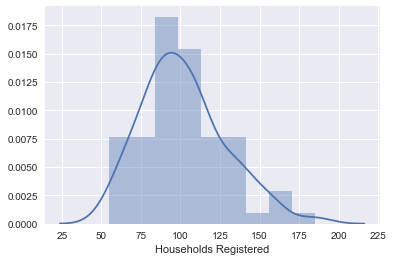

In [58]:
print("\n\n Summarizing Key Variables  Count --> # of CHWs")
summarizer( og_only_dataset, colz=argz_EPM+argz_pct)
sns.distplot( og_only_dataset["Households Registered"])

In [60]:
print("\n\n Summarizing Disease Cases -  Count--> # of CHWs")
summarizer( og_only_dataset, colz=argz_cases)



 Summarizing Disease Cases -  Count--> # of CHWs


,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Pregnancy
count,72.00,72.00,72.00,72.00
mean,5.81,5.53,6.00,3.38
std,10.07,6.58,6.34,2.51
min,0.00,0.00,0.00,0.00
20%,0.00,0.20,1.00,1.00
40%,1.00,2.00,4.00,2.00
50%,1.50,3.00,5.00,3.00
60%,2.60,5.00,5.00,4.00
80%,9.80,9.00,9.00,6.00
max,51.00,32.00,30.00,10.00


# KE Data

Looking at all of KE data in from 2015 to 2017




In [114]:
## KE Variables -- 

KE_3yrs_dataset["assess_child"] = KE_3yrs_dataset["assess_u1"]+KE_3yrs_dataset["assess_u5"]
KE_3yrs_dataset["treat_child"] = KE_3yrs_dataset["treatments_u1"]+KE_3yrs_dataset["treatments_u5"]
KE_3yrs_dataset["malaria_child"] = KE_3yrs_dataset["malaria_u1"]+KE_3yrs_dataset["malaria_u5"]
KE_3yrs_dataset["diarrhea_child"] = KE_3yrs_dataset["diarrhea_u1"]+KE_3yrs_dataset["diarrhea_u5"]
KE_3yrs_dataset["pneumonia_child"] = KE_3yrs_dataset["pneumonia_u1"]+KE_3yrs_dataset["pneumonia_u5"]

argz_KE_grpz = ["Country", "branch_name", "Year"]

argz_KE_n1 = ["branch_uuid", "supervisor_uuid", "chw_uuid"]
argz_KE_n2 = ["active_chws_in_period", "families_registered", "population_served", "u5_population_served"]

argz_KE_EPM = [ "families_registered","pregnancies_registered", "community_events"]

argz_KE_malaria =  ["mrdt_positive", "mrdt_negative", "mrdt_none", "malaria_all_ages", "malaria_all_ages_gave_al", "act_6packs_issued", "malaria_u5_mrtd_pos_treated", "malaria_o5_mrtd_pos_treated", "chps_treating_malaria" ]
argz_KE_U1_cases = ["assess_u1", "treatments_u1","malaria_u1", "diarrhea_u1","pneumonia_u1",  ]
argz_KE_U5_cases = ["assess_u5", "treatments_u5" ,"malaria_u5", "diarrhea_u5","pneumonia_u5", ]

argz_KE_child_cases = ["assess_any", "assess_child", "treat_child", "malaria_child", "diarrhea_child", "pneumonia_child" ]
agrz_KE_referral = ["families_visited", "required_follow_ups", "on_time_follow_ups", "missed_visits", "on_time_pnc_visits_48h", ]

argz_KE_pregnancy_cases = ["pregnancies_registered", "on_time_pnc_visits", "total_healthy_pnc_visits", "all_first_fu_pnc_visits", "anc_visits", "total_deliveries", "total_deliveries_at_hf", "underage_pregnancies"]

argz_KE_pct = []

In [89]:
print("\n\n 1.Sample details")
KE_3yrs_dataset.info()



 1.Sample details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 94 columns):
branch_uuid                                      504 non-null object
branch_name                                      504 non-null object
supervisor_uuid                                  504 non-null object
supervisor_name                                  504 non-null object
chw_uuid                                         504 non-null object
chw_name                                         504 non-null object
chw_phone                                        504 non-null object
interval_start                                   504 non-null object
interval_number                                  504 non-null int64
active_chws_in_period                            504 non-null int64
families_registered                              504 non-null int64
pregnancies_registered                           504 non-null int64
on_time_pnc_visits                               50

In [121]:
#KE_3yrs_dataset.groupby(["Year", "branch_name"]).value_counts()
KE_3yrs_dataset.groupby(["Year", "branch_name"])[argz_KE_n1].describe(  )
sampleStructure( KE_3yrs_dataset, argz_KE_n, grp="Year")

branch_uuid                                               \
                         count unique                                   top   
Year branch_name                                                              
2015 Busia                  12      1      fc675f8ba170bc9692b3b706613a0824   
     Butula                 12      1      a520223ea9bd16a37306513a4ff1b98e   
     Funyula                12      1  a027e5dc-b693-41ee-8cbe-f7087dc95401   
     HQ                     12      1      fc675f8ba170bc9692b3b7066138f404   
     Kenyenya               12      1      fc675f8ba170bc9692b3b706613afcaa   
     Kuresoi                12      1  dc8e9f70-8c19-4411-8753-a82239a0869f   
     Malaba                 12      1      fc675f8ba170bc9692b3b706613a2e54   
     Malava                 12      1      18ba22fb07334baa30fe0e81f9d7e2fc   
     Nambale                12      1      fc51d6e19c193f5bf77f904fda457a8c   
     Ogembo                 12      1      e35ae500a82a44367dfd5b8fd245a2ce   
     Port Victoria          12      1      fc675f8ba170bc9692b3b706613a62bf   
     Shinyalu               12      1      3096fd4c71868b066eb3710462230d06   
     Suneka                 12      1      fc675f8ba170bc9692b3b706613a94b9   
     Thika                  12      1      fc675f8ba170bc9692b3b706613accb1   
2016 Busia                  12      1      fc675f8ba170bc9692b3b706613a0824   
     Butula                 12      1      a520223ea9bd16a37306513a4ff1b98e   
     Funyula                12      1  a027e5dc-b693-41ee-8cbe-f7087dc95401   
     HQ                     12      1      fc675f8ba170bc9692b3b7066138f404   
     Kenyenya               12      1      fc675f8ba170bc9692b3b706613afcaa   
     Kuresoi                12      1  dc8e9f70-8c19-4411-8753-a82239a0869f   
     Malaba                 12      1      fc675f8ba170bc9692b3b706613a2e54   
     Malava                 12      1      18ba22fb07334baa30fe0e81f9d7e2fc   
     Nambale                12      1      fc51d6e19c193f5bf77f904fda457a8c   
     Ogembo                 12      1      e35ae500a82a44367dfd5b8fd245a2ce   
     Port Victoria          12      1      fc675f8ba170bc9692b3b706613a62bf   
     Shinyalu               12      1      3096fd4c71868b066eb3710462230d06   
     Suneka                 12      1      fc675f8ba170bc9692b3b706613a94b9   
     Thika                  12      1      fc675f8ba170bc9692b3b706613accb1   
2017 Busia                  12      1      fc675f8ba170bc9692b3b706613a0824   
     Butula                 12      1      a520223ea9bd16a37306513a4ff1b98e   
     Funyula                12      1  a027e5dc-b693-41ee-8cbe-f7087dc95401   
     HQ                     12      1      fc675f8ba170bc9692b3b7066138f404   
     Kenyenya               12      1      fc675f8ba170bc9692b3b706613afcaa   
     Kuresoi                12      1  dc8e9f70-8c19-4411-8753-a82239a0869f   
     Malaba                 12      1      fc675f8ba170bc9692b3b706613a2e54   
     Malava                 12      1      18ba22fb07334baa30fe0e81f9d7e2fc   
     Nambale                12      1      fc51d6e19c193f5bf77f904fda457a8c   
     Ogembo                 12      1      e35ae500a82a44367dfd5b8fd245a2ce   
     Port Victoria          12      1      fc675f8ba170bc9692b3b706613a62bf   
     Shinyalu               12      1      3096fd4c71868b066eb3710462230d06   
     Suneka                 12      1      fc675f8ba170bc9692b3b706613a94b9   
     Thika                  12      1      fc675f8ba170bc9692b3b706613accb1   

                        supervisor_uuid                       chw_uuid         \
                   freq           count unique       top freq    count unique   
Year branch_name                                                                
2015 Busia           12              12      1  multiple   12       12      1   
     Butula          12              12      1  multiple   12       12      1   
     Funyula         12              12      1  multiple  

active_chws_in_period       families_registered        population_served  \
                       sum  mean                 sum   mean               sum   
Year                                                                            
2015                     2   0.0                   2    0.0                 2   
2016                  2641  15.7               53764  320.0            193583   
2017                 12003  71.4               89256  531.3            348613   

             u5_population_served         
        mean                  sum   mean  
Year                                      
2015     0.0                    0    0.0  
2016  1152.3                24952  148.5  
2017  2075.1                70134  417.5

In [133]:
print("\n\n 1. Ogembo Only")
sampleStructure( KE_3yrs_dataset[ KE_3yrs_dataset["branch_name"] == "Ogembo"], argz_KE_n, grp="Year", fx=[np.mean, max ])
summarizer( og_only_dataset, argz_n)



 1. Ogembo Only


active_chws_in_period     families_registered       population_served  \
                      mean max                mean   max              mean   
Year                                                                         
2015                   0.0   0                 0.0     0               0.0   
2016                   0.0   0                 0.0     0               0.0   
2017                  46.4  72               599.3  6410            2394.8   

            u5_population_served        
        max                 mean   max  
Year                                    
2015      0                  0.0     0  
2016      0                  0.0     0  
2017  25037                380.8  3306

,Households Registered
count,72.00
mean,102.00
std,26.73
min,55.00
20%,81.40
40%,91.60
50%,99.50
60%,105.00
80%,120.60
max,185.00


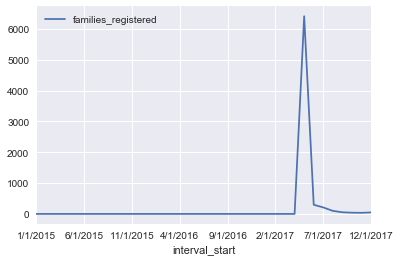

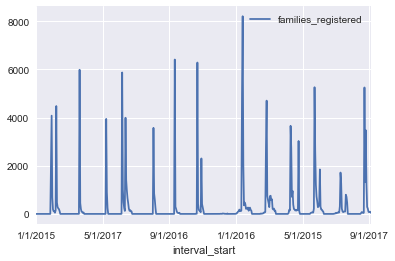

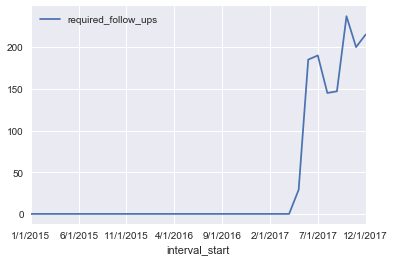

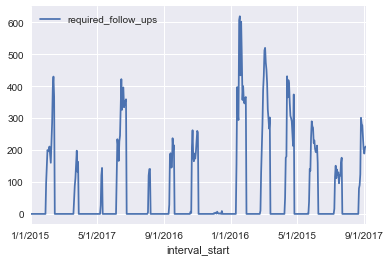

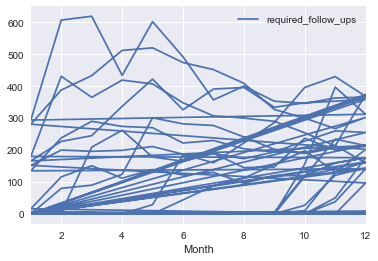

In [147]:
KE_3yrs_dataset[ KE_3yrs_dataset["branch_name"]=="Ogembo"].plot( kind="line", x="interval_start", y="families_registered")
KE_3yrs_dataset.plot( kind="line", x="interval_start", y="families_registered")


KE_3yrs_dataset[ KE_3yrs_dataset["branch_name"]=="Ogembo"].plot( kind="line", x="interval_start", y="required_follow_ups")
KE_3yrs_dataset.plot( kind="line", x="interval_start", y="required_follow_ups")

#KE_3yrs_dataset[ KE_3yrs_dataset["branch_name"]=="Ogembo"].plot( kind="line", x="Month", y="required_follow_ups")
KE_3yrs_dataset.plot( kind="line", x="Month", y="required_follow_ups")

# Appendix

## Summary Stats for Ogembo

In [25]:
print("\n\n1. Summary Stats for Key Indicators - count-># CHWs")
summarizer( og_only_dataset, colz=argz_EPM)


print("\n\n2. Summary Stats for Malaria - count-># CHWs")
summarizer( og_only_dataset, colz=argz_malaria)

print("\n\n3. Summary Stats for Cases - count-># CHWs")
summarizer( og_only_dataset, colz=argz_cases)





1. Summary Stats for Key Indicators - count-># CHWs


,Households Registered,Sales,Community Events,Total Assessments,Total Referrals,All Malaria Assessments
count,72.00,72.00,72.00,72.00,72.00,72.00
mean,102.00,7296.16,6.22,64.47,0.67,12.89
std,26.73,10186.00,5.47,35.37,0.44,16.18
min,55.00,-1040.00,0.00,0.00,0.00,0.00
20%,81.40,1493.88,2.00,35.40,0.00,1.00
40%,91.60,3971.98,5.00,55.00,0.81,4.00
50%,99.50,4909.43,5.00,59.00,0.98,7.00
60%,105.00,6095.52,7.00,67.20,1.00,11.00
80%,120.60,9771.74,9.00,90.80,1.00,21.00
max,185.00,59812.62,29.00,170.00,1.00,76.00




2. Summary Stats for Malaria - count-># CHWs


,All Malaria Assessments,All Malaria Treatments,U5 Malaria,Act 6pack Issue,mRDT Used
count,72.00,72.00,72.00,72.00,72.00
mean,12.89,6.60,5.81,11.19,12.89
std,16.18,11.06,10.07,16.80,16.18
min,0.00,0.00,0.00,0.00,0.00
20%,1.00,0.00,0.00,0.00,1.00
40%,4.00,1.00,1.00,3.00,4.00
50%,7.00,2.00,1.50,4.00,7.00
60%,11.00,4.00,2.60,5.00,11.00
80%,21.00,9.00,9.80,20.80,21.00
max,76.00,55.00,51.00,81.00,76.00




3. Summary Stats for Cases - count-># CHWs


,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Pregnancy
count,72.00,72.00,72.00,72.00
mean,5.81,5.53,6.00,3.38
std,10.07,6.58,6.34,2.51
min,0.00,0.00,0.00,0.00
20%,0.00,0.20,1.00,1.00
40%,1.00,2.00,4.00,2.00
50%,1.50,3.00,5.00,3.00
60%,2.60,5.00,5.00,4.00
80%,9.80,9.00,9.00,6.00
max,51.00,32.00,30.00,10.00
